# Supervised classification examples w/ scikit-learn

## Install scikit-learn

In [1]:
!pip install -U scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/40/c6/2e91eefb757822e70d351e02cc38d07c137212ae7c41ac12746415b4860a/scikit_learn-1.3.2-cp311-cp311-macosx_12_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 5.6 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.0
    Uninstalling scikit-learn-1.3.0:
      Successfully uninstalled scikit-learn-1.3.0


## Dummy example - Exercise 15.1

In [14]:
from sklearn.neighbors import KNeighborsClassifier

x_train = [ [1, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 1] ]  # data as array of vectors
y_train = [0, 0, 1, 1] # category for every example

knn = KNeighborsClassifier(n_neighbors=3) # kNN classifier with k=3
knn.fit(x_train, y_train) # fit() takes X and Y.

x = [[0, 1, 0]]  # vector to classify

print(knn.predict_proba(x))  # print the probabilities for each category.
print(knn.predict(x)) # print predicted category

[[0.66666667 0.33333333]]
[0]


## scikit-learn algorithms example with the [Iris dataset](https://archive.ics.uci.edu/ml/datasets/iris)

The iris dataset is a classic and very easy multi-class classification dataset. It consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray

The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width.

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

iris_data = load_iris(as_frame=True)
iris_data.frame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [4]:
# split initial data into train and test (50 examples for test)
X_train, X_test, y_train, y_test = train_test_split(iris_data.data.to_numpy(),
                                                    iris_data.target.to_numpy(),
                                                    test_size=20)


# split rest of the train data into train and dev
X_train, X_dev, y_train, y_dev = train_test_split(X_train, y_train,
                                                  test_size=30)

print(X_train.shape, y_train.shape)  # print the dimensions of the arrays
print(X_dev.shape, y_dev.shape)  # print the dimensions of the arrays
print(X_test.shape, y_test.shape)  # print the dimensions of the arrays

(100, 4) (100,)
(30, 4) (30,)
(20, 4) (20,)


### Naive Bayes

In [5]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

nb = GaussianNB()
nb.fit(X_train, y_train)
print(classification_report(y_train, nb.predict(X_train),
                            zero_division=1))
print(classification_report(y_test, nb.predict(X_test),
                            zero_division=1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       0.95      0.97      0.96        36
           2       0.97      0.94      0.96        34

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.80      1.00      0.89         4
           2       1.00      0.86      0.92         7

    accuracy                           0.95        20
   macro avg       0.93      0.95      0.94        20
weighted avg       0.96      0.95      0.95        20



### Decision Tree

In [6]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(X_train, y_train)
print(classification_report(y_train, dt.predict(X_train),
                            zero_division=1))
print(classification_report(y_test, dt.predict(X_test),
                            zero_division=1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00        34

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.57      1.00      0.73         4
           2       1.00      0.57      0.73         7

    accuracy                           0.85        20
   macro avg       0.86      0.86      0.82        20
weighted avg       0.91      0.85      0.85        20



### Random Forest

In [7]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='entropy')
rf.fit(X_train, y_train)
print(classification_report(y_train, rf.predict(X_train),
                            zero_division=1))
print(classification_report(y_test, rf.predict(X_test),
                            zero_division=1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00        34

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.80      1.00      0.89         4
           2       1.00      0.86      0.92         7

    accuracy                           0.95        20
   macro avg       0.93      0.95      0.94        20
weighted avg       0.96      0.95      0.95        20



### AdaBoost

In [8]:
from sklearn.ensemble import AdaBoostClassifier

ab = AdaBoostClassifier()
ab.fit(X_train, y_train)
print(classification_report(y_train, ab.predict(X_train),
                            zero_division=1))
print(classification_report(y_test, ab.predict(X_test),
                            zero_division=1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      0.97      0.99        36
           2       0.97      1.00      0.99        34

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.57      1.00      0.73         4
           2       1.00      0.57      0.73         7

    accuracy                           0.85        20
   macro avg       0.86      0.86      0.82        20
weighted avg       0.91      0.85      0.85        20



### $k$-NN with hyper-parameter tuning

In [9]:
from sklearn.metrics import accuracy_score
from tqdm import tqdm


best_k = 0  # holds the best value for k
best_dev_acc = .0  # how correct we are
best_clf = None  # save the best classifier

for k in tqdm(range(1, 11)):
  knn = KNeighborsClassifier(n_neighbors=k)  # knn object with current k
  knn.fit(X_train, y_train) # fit with current k in the TRAINING data...

  preds = knn.predict(X_dev) # predict with current k using the DEV data...
  acc = accuracy_score(y_dev, preds) # count accuracy

  # if current accuracy is higher than the previously best...
  if best_dev_acc == .0 or acc > best_dev_acc:
    best_dev_acc = acc
    best_k = k
    best_clf = knn


print('Best dev accuracy:', best_dev_acc)
print('Best K:', best_k)

test_preds = best_clf.predict(X_test)  # predict the test data with the best classifier...
print('Test accuracy:', accuracy_score(y_test, test_preds))

100%|██████████████████████████████████████████| 10/10 [00:00<00:00, 713.47it/s]

Best dev accuracy: 0.9666666666666667
Best K: 3
Test accuracy: 0.95


## Learning Curve with scikit-learn

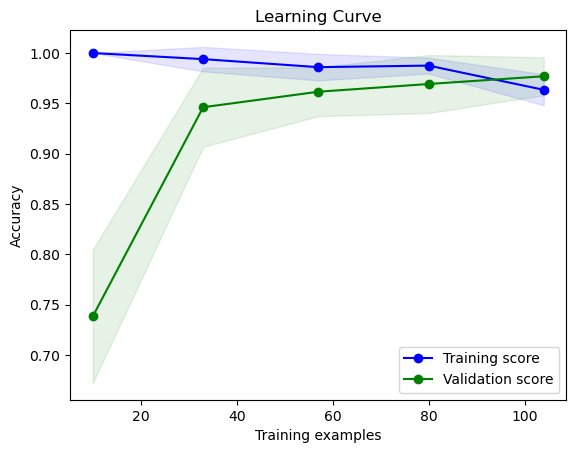

<module 'matplotlib.pyplot' from '/Users/dplavos/anaconda3/lib/python3.11/site-packages/matplotlib/pyplot.py'>

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import make_scorer
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title,
                        X_for_val, y_for_val,
                        X_for_test=None, y_for_test=None,
                        ylim=None,
                        val_cv=None,
                        test_cv=None,
                        train_sizes=np.linspace(.1, 1.0, 5)):

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Accuracy")
    # print(train_sizes)
    train_sizes, train_scores, val_scores = learning_curve(
        estimator,
        X_for_val, y_for_val,
        cv=val_cv, n_jobs=-1, scoring='accuracy',
        train_sizes=train_sizes)

    # print(train_sizes)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)
    val_scores_std = np.std(val_scores, axis=1)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="b")
    plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                     val_scores_mean + val_scores_std, alpha=0.1,
                     color="green")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="b",
             label="Training score")
    plt.plot(train_sizes, val_scores_mean, 'o-', color="green",
             label="Validation score")


    # _, _, test_scores = learning_curve(estimator,
    #                                    X_for_test, y_for_test,
    #                                    cv=test_cv, n_jobs=-1,
    #                                    scoring='accuracy',
    #                                    train_sizes=train_sizes)


    # test_scores_mean = np.mean(test_scores, axis=1)
    # test_scores_std = np.std(test_scores, axis=1)
    # plt.grid()


    # plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
    #                  test_scores_mean + test_scores_std, alpha=0.1,
    #                  color="red")

    # plt.plot(train_sizes, test_scores_mean, 'o-', color="red",
    #          label="Test score")

    plt.legend(loc="lower right")
    plt.show()
    return plt

plot_learning_curve(estimator=best_clf, title='Learning Curve',
                    X_for_val=np.concatenate((X_train, X_dev), axis=0),
                    y_for_val=np.concatenate((y_train, y_dev), axis=0),
                    val_cv=None)

# plt.savefig('curve.png', bbox_inches='tight')
# plt.show()

## custom k-NN example

In [11]:
from statistics import mode

class KNN:
  def __init__(self, k):
    self.k = k
    self.x_train, self.y_train = None, None

  @staticmethod
  def calculate_distance(x, y):
    return np.linalg.norm(x - y)  # euclidean distance

  def fit(self, x, y):
    self.x_train = x
    self.y_train = y

  def predict(self, x):
    predicted_classes = list()

    for unlabeled in x:
      distances = list()

      for i in range(len(self.x_train)):
        d = self.calculate_distance(self.x_train[i], unlabeled) # distance
        distances.append(d)

      distances = np.array(distances)
      top_k_idx = np.argsort(distances)[:self.k]  # take k closer

      y = self.y_train[top_k_idx]

      predicted_classes.append(mode(y))  # majority voting

    return np.array(predicted_classes)

In [12]:
for k in tqdm(range(1, 11)):
  knn = KNN(k=k)  # knn object with current k
  knn.fit(X_train, y_train) # fit with current k in the TRAINING data...

  preds = knn.predict(X_dev) # predict with current k using the DEV data...
  acc = accuracy_score(y_dev, preds) # count accuracy

  # if current accuracy is higher than the previously best...
  if best_dev_acc == .0 or acc > best_dev_acc:
    best_dev_acc = acc
    best_k = k
    best_clf = knn


print('\nBest dev accuracy:', best_dev_acc)
print('Best K:', best_k)

test_preds = best_clf.predict(X_test)  # predict the test data with the best classifier...
print('Test accuracy:', accuracy_score(y_test, test_preds))

100%|██████████████████████████████████████████| 10/10 [00:00<00:00, 137.67it/s]


Best dev accuracy: 0.9666666666666667
Best K: 3
Test accuracy: 0.95


## Custom Learning Curves

(20, 4)
(20,)
(40, 4)
(40,)
(60, 4)
(60,)
(80, 4)
(80,)
(100, 4)
(100,)


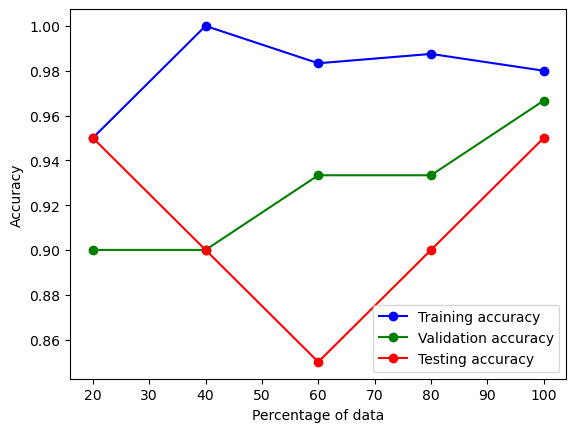

In [13]:
def custom_learning_curve(x_train, y_train,
                          x_val, y_val, x_test, y_test,
                          n_splits):

  split_size = int(len(x_train) / n_splits)
  x_splits = np.split(x_train, n_splits) # must be equal division
  y_splits = np.split(y_train, n_splits)
  train_accuracies = list()
  val_accuracies = list()
  test_accuracies = list()
  curr_x = x_splits[0]
  print(curr_x.shape)
  curr_y = y_splits[0]
  print(curr_y.shape)
  knn = KNeighborsClassifier(n_neighbors=best_k)
  knn.fit(curr_x, curr_y)
  train_accuracies.append(accuracy_score(curr_y,
                                         knn.predict(curr_x)))

  val_accuracies.append(accuracy_score(y_val, knn.predict(x_val)))
  test_accuracies.append(accuracy_score(y_test, knn.predict(x_test)))

  for i in range(1, len(x_splits)):
    knn = KNeighborsClassifier(n_neighbors=best_k)
    curr_x = np.concatenate((curr_x, x_splits[i]), axis=0)
    print(curr_x.shape)
    curr_y = np.concatenate((curr_y, y_splits[i]), axis=0)
    print(curr_y.shape)
    knn.fit(curr_x, curr_y)

    train_accuracies.append(accuracy_score(curr_y,
                                           knn.predict(curr_x)))

    val_accuracies.append(accuracy_score(y_val, knn.predict(x_val)))

    test_accuracies.append(accuracy_score(y_test, knn.predict(x_test)))

  plt.plot(list(range(split_size, len(x_train) + split_size,
                      split_size)), train_accuracies, 'o-', color="b",
             label="Training accuracy")
  plt.plot(list(range(split_size, len(x_train) + split_size,
                      split_size)), val_accuracies, 'o-', color="green",
           label="Validation accuracy")
  plt.plot(list(range(split_size, len(x_train) + split_size,
                      split_size)), test_accuracies, 'o-', color="red",
           label="Testing accuracy")
  plt.legend(loc="lower right")
  plt.xlabel('Percentage of data')
  plt.ylabel('Accuracy')
  plt.show()

custom_learning_curve(x_train=X_train, y_train=y_train,
                      x_val=X_dev, y_val=y_dev, x_test=X_test,
                      y_test=y_test, n_splits=5)